<a href="https://colab.research.google.com/github/namita0210/Audio-data-analysis-with-pytorch/blob/main/Exploring_inbuilt_audio_%26_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import os
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
import torchaudio.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
print(torch.__version__)
print(torchaudio.__version__)

1.13.0+cu117
0.13.0+cu117


Load the data

In [6]:
os.makedirs('data' , exist_ok=True)

In [7]:
data = datasets.SPEECHCOMMANDS(root='data', download=True)
print(data)

  0%|          | 0.00/2.26G [00:00<?, ?B/s]

Explore the data

In [8]:
num_samples = len(data)
print(f"Number of samples: {num_samples}")

Number of samples: 105829


In [11]:
sample, sample_rate, label,speaker_id,utterance_number = data[0]
print(f'''
Tensor waveform of audio sample: {sample}
Sample rate: {sample_rate}
Label: {label}
Speaker ID: {speaker_id}
Utterance number: {utterance_number}
''')

 
Tensor waveform of audio sample: tensor([[-0.0658, -0.0709, -0.0753,  ..., -0.0700, -0.0731, -0.0704]])
Sample rate: 16000
Label: backward
Speaker ID: 0165e0e8
Utterance number: 0



In [13]:
#shape of the tensor
sample.shape

torch.Size([1, 16000])

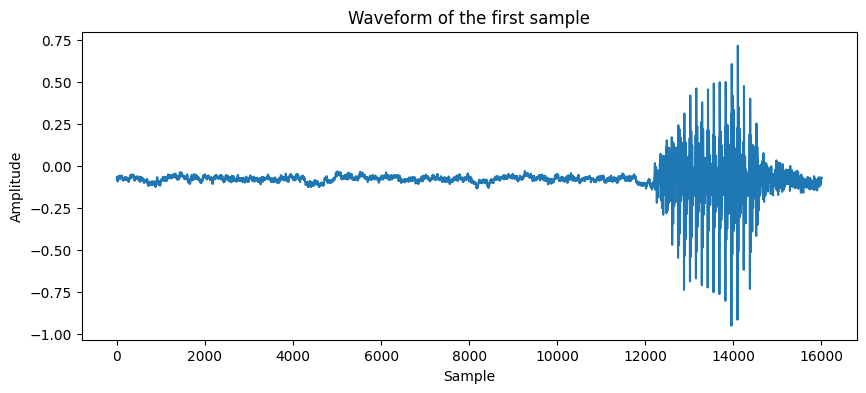

In [20]:
#Waveform of first sample
plt.figure(figsize=(10,4))
plt.plot(sample.t().numpy())
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform of the first sample')
plt.show()

In [22]:
list_of_medians = []
while(num_samples > 0):
  num_samples = num_samples/2
  list_of_medians.append(num_samples)
print(f''' Length of the median list : {len(list_of_medians)}  ''')

 
Length of the median list : 1092
      


In [ ]:
label_distribution = {}

# Iterate through each tuple in the dataset
for sample in list_of_medians:
    label = sample[2]  # Index 2 corresponds to the label in the tuple
    # Increment the count for the corresponding label
    label_distribution[label] = label_distribution.get(label, 0) + 1

# Print the label distribution
print("Label distribution:")
for label, count in label_distribution.items():
    print(f"{label}: {count}")

# Optionally, visualize the label distribution
plt.bar(label_distribution.keys(), label_distribution.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()
